#Titanic - Machine Learning from Disaster
- data : https://www.kaggle.com/competitions/titanic/overview

## 1. Data

### 1-1. Data loding

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/sample_data/test.csv')

### 1-2 Feature Engineering
-  데이터 시각화 및 검토
-  null값 검토
-  필요 없는 feature 제거
-  나이 null값 회귀로 구해보기

#### 1). 데이터 시각화 및 검토

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

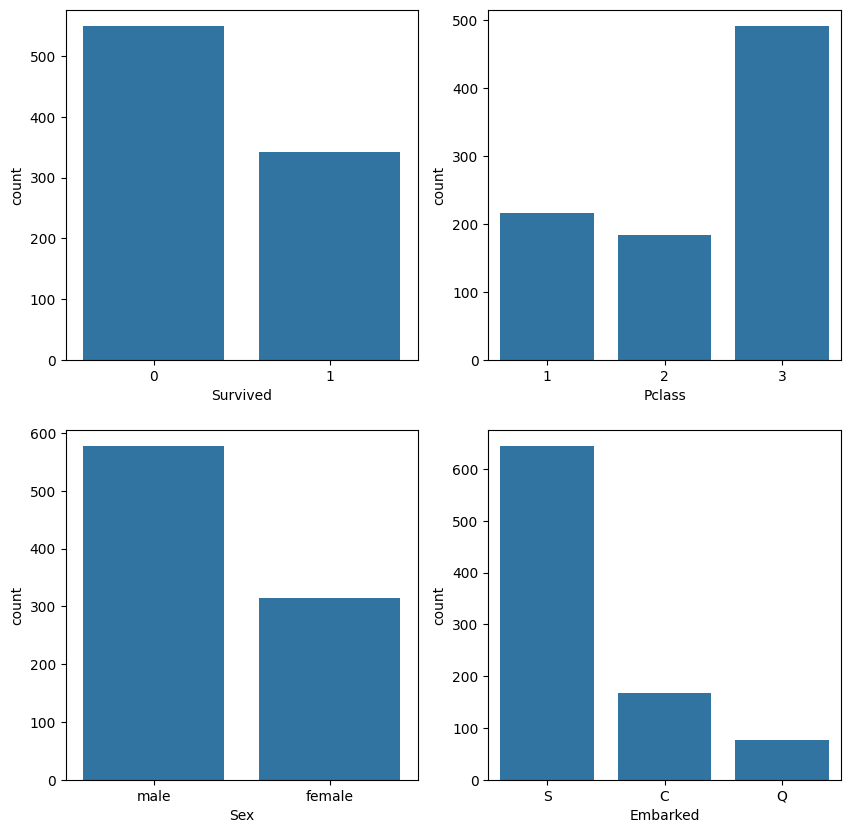

In [7]:
#카테고리 변수 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=train)
plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', data=train)
plt.subplot(2, 2, 3)
sns.countplot(x='Sex', data=train)
plt.subplot(2, 2, 4)
sns.countplot(x='Embarked', data=train)
plt.show()

In [5]:
#비율 확인하기
print(train['Survived'].value_counts() / len(train))
print(train['Pclass'].value_counts() / len(train))
print(train['Sex'].value_counts() / len(train))
print(train['Embarked'].value_counts() / len(train))

'''
사망:생존 = 0.61:0.38
1등급:2등급:3등급 = 0.24:0.20:0.55
여성:남성 = 0.35:0.65
S:C:Q = 0.72:0.19:0.09
'''

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64
Sex
male      0.647587
female    0.352413
Name: count, dtype: float64
Embarked
S    0.722783
C    0.188552
Q    0.086420
Name: count, dtype: float64


'\n사망:생존 = 0.61:0.38\n1등급:2등급:3등급 = 0.24:0.20:0.55\n여성:남성 = 0.35:0.65\nS:C:Q = 0.72:0.19:0.09\n'

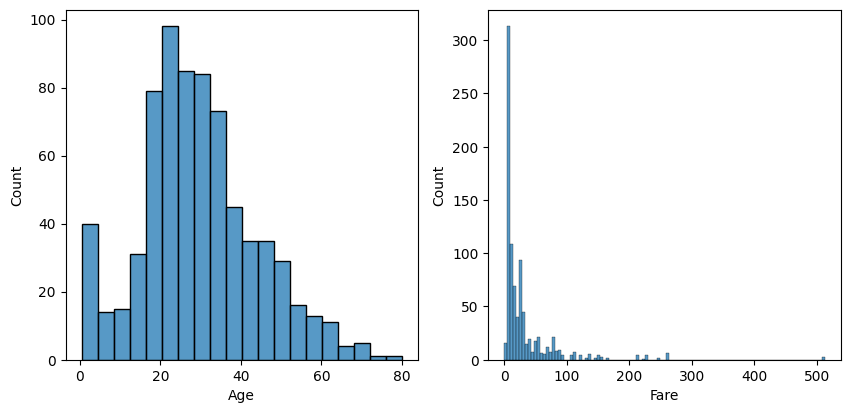

In [8]:
#연속형 변수 시각화
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.histplot(x='Age', data=train)
plt.subplot(2, 2, 2)
sns.histplot(x='Fare', data=train)
plt.show()

#### 2). null 검토

In [9]:
# null값 처리
print("train :\n", train.isnull().sum())
print("test :\n", test.isnull().sum())
# cabin -> null 많아서 drop

train :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
test :
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### 3). 필요 없는 feature 제거

In [10]:
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_use = train.drop(drop_cols, axis=1)
test_use = test.drop(drop_cols, axis=1)

#### 4). 나이값 null 처리 & 범주형 변수 변환

In [11]:
#sex 0,1 변환
train_use['Sex'] = train_use['Sex'].map({'male':1, 'female':0})
test_use['Sex'] = test_use['Sex'].map({'male':1, 'female':0})

#Embarked 변환
train_use['Embarked'] = train_use['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_use['Embarked'] = test_use['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [12]:
#1. 중간값으로 나이 보간.
train_use_median = train_use
test_use_median = test_use
train_use_median['Age'] = train_use['Age'].fillna(train_use['Age'].median())
test_use_median['Age'] = test_use['Age'].fillna(test_use['Age'].median())

In [13]:
#2. Embarked null값 최빈값으로 보간하기
train_use_median['Embarked'].fillna(train_use_median['Embarked'].mode()[0], inplace=True)
# mode() 함수는 최빈값을 Series 형식으로 출력.

/tmp/ipython-input-1743971073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_use_median['Embarked'].fillna(train_use_median['Embarked'].mode()[0], inplace=True)


## 2. ML

### 1). 로지스틱 회귀

#### 1-1. 학습

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

X = train_use_median.drop('Survived', axis=1)
y = train_use_median['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 1-2. 결과 확인
- 점수 확인 (accuracy, precision, recall, F1 score)
- 혼동행렬 시각화
- roc 커브

In [18]:
#1. 점수 확인
print("accuracy(정확도) : ", accuracy_score(y_test, y_pred))
print("precision(정밀도) : ", precision_score(y_test, y_pred))
print("recall(재현율) : ", recall_score(y_test, y_pred))
print("f1_score : ", f1_score(y_test, y_pred))
print(train['Survived'].value_counts() / len(train))

#불균형도 0.62 : 0.38이지만, f1_score 0.75로 좋은 성능.

accuracy(정확도) :  0.7988826815642458
precision(정밀도) :  0.7714285714285715
recall(재현율) :  0.7297297297297297
f1_score :  0.75
Survived
0    0.616162
1    0.383838
Name: count, dtype: float64


In [22]:
confusion_matrix(y_test, y_pred)

array([[89, 16],
       [20, 54]])

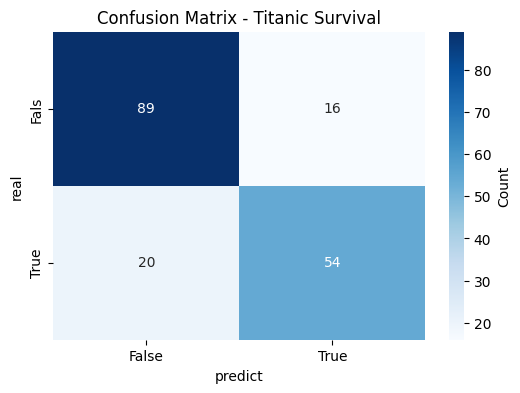

In [29]:
#2. 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False', 'True'],
            yticklabels=['Fals', 'True'],
            cbar_kws={'label': 'Count'})
plt.xlabel('predict')
plt.ylabel('real')
plt.title('Confusion Matrix - Titanic Survival')
plt.show()

In [ ]:
#로지스틱 roc 커브